Forma original de entrenamiento: (60000, 28, 28)
Forma después de agregar canal: (60000, 28, 28, 1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.8932 - loss: 0.3504 - val_accuracy: 0.9822 - val_loss: 0.0612
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9833 - loss: 0.0534 - val_accuracy: 0.9877 - val_loss: 0.0411
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9884 - loss: 0.0348 - val_accuracy: 0.9902 - val_loss: 0.0361
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


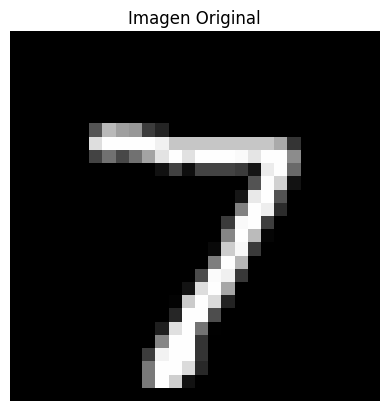


Capa: Conv1
Forma de salida: (1, 26, 26, 32)


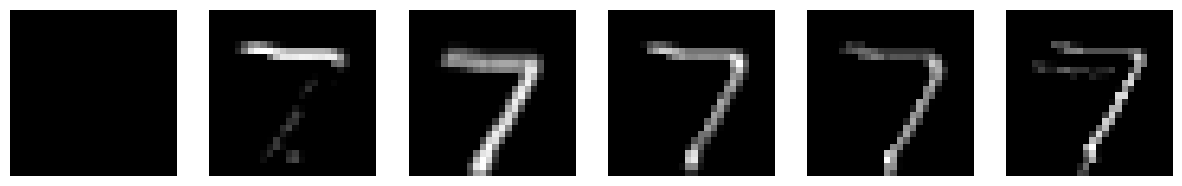


Capa: Pooling1
Forma de salida: (1, 13, 13, 32)


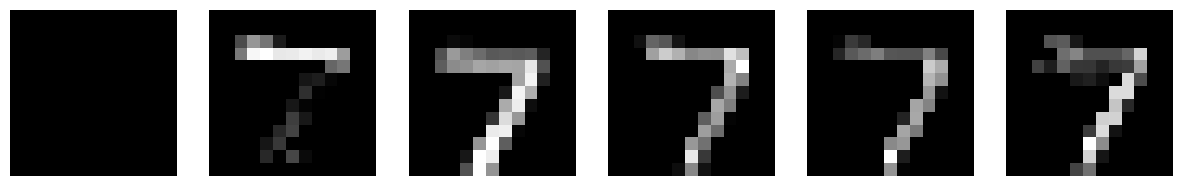


Capa: Conv2
Forma de salida: (1, 11, 11, 64)


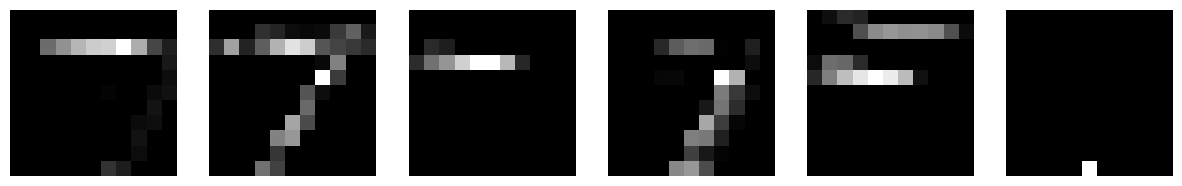


Capa: Pooling2
Forma de salida: (1, 5, 5, 64)


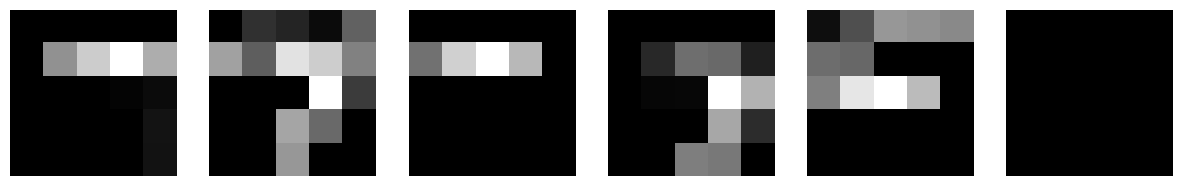

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step

Antes de Flatten: (1, 5, 5, 64)
Después de Flatten: (1, 1600)
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9866 - loss: 0.0393

Precisión final en test: 0.989799976348877


In [4]:
# ==========================================================
# RED NEURONAL CONVOLUCIONAL (CNN) PASO A PASO
# VISUALIZANDO CADA CAPA
# Dataset: MNIST
# ==========================================================

# ==============================
# 1️⃣ IMPORTAR LIBRERÍAS
# ==============================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# 2️⃣ CARGAR DATASET
# ==============================

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Forma original de entrenamiento:", x_train.shape)

# ==============================
# 3️⃣ PREPROCESAMIENTO
# ==============================

# Normalizamos valores de 0-255 → 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Agregamos dimensión de canal (escala de grises = 1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Forma después de agregar canal:", x_train.shape)

# ==============================
# 4️⃣ CREAR MODELO CNN
# ==============================

model = keras.Sequential([

    # 🔹 Capa de entrada
    #28 = alto
    #28 = ancho
    #1 = canal (escala de grises)
    layers.Input(shape=(28,28,1)),

    # 🔹 Capa 1 - Convolución
     #Usa 32 filtros, Cada filtro es de tamaño 3x3, Se desliza por toda la imagen
    #Bordes,Líneas,Curvas pequeñas, Esquinas, Es como si tuvieras 32 detectores mirando la imagen.
    layers.Conv2D(32, (3,3), activation='relu'),

    # 🔹 Capa 2 - Pooling
    #Reduce el tamaño, Hace el modelo más rápido, Reduce sobreajuste, Conserva lo más importante, Es como hacer un resumen de la imagen.
    layers.MaxPooling2D((2,2)),


    # 🔹 Capa 3 - Segunda Convolución
    #64 filtros (más capacidad), Ya no detecta solo bordes simples, Partes completas del número
    #Combinaciones de líneas, Curvas más grandes, Estructura del dígito
    layers.Conv2D(64, (3,3), activation='relu'),

    # 🔹 Capa 4 - Segundo Pooling
    #Reduce nuevamente el tamaño. En este punto ya tenemos solo la información más relevante
    layers.MaxPooling2D((2,2)),


    # 🔹 Capa 5 - Flatten
    #Convierte la salida 2D en un vector 1D, Es como transformar una imagen en una fila de números.
    layers.Flatten(),

    # 🔹 Capa 6 - Densa
    #Combina toda la información aprendida. aquí se toman decisiones.
    layers.Dense(64, activation='relu'),

    # 🔹 Capa 7 - Salida
    #Convierte los resultados en probabilidades. 90% probabilidad de que sea el número 2, La red elige el número con mayor probabilidad.
    layers.Dense(10, activation='softmax')
])

# Mostrar arquitectura
model.summary()

# ==============================
# 5️⃣ COMPILAR
# ==============================

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ==============================
# 6️⃣ ENTRENAR
# ==============================

history = model.fit(
    x_train,
    y_train,
    epochs=3,
    validation_split=0.1
)

# ==========================================================
# 🔥 ACTIVAMOS EL MODELO (IMPORTANTE)
# ==========================================================

# Esto evita el error de "layer has never been called"
model.predict(x_train[:1])

# ==========================================================
# 7️⃣ CREAR MODELO PARA VISUALIZAR CAPAS
# ==========================================================

layer_outputs = [layer.output for layer in model.layers[:4]]

visual_model = keras.Model(
    inputs=model.inputs,   # ⚠ usamos model.inputs (corregido)
    outputs=layer_outputs
)

# Tomamos una imagen de prueba
img = x_test[0:1]

# Obtenemos activaciones
activations = visual_model.predict(img)

# ==============================
# 8️⃣ MOSTRAR IMAGEN ORIGINAL
# ==============================

plt.imshow(img[0].squeeze(), cmap='gray')
plt.title("Imagen Original")
plt.axis("off")
plt.show()

# ==============================
# 9️⃣ MOSTRAR SALIDA DE CADA CAPA
# ==============================

layer_names = ["Conv1", "Pooling1", "Conv2", "Pooling2"]

for layer_name, activation in zip(layer_names, activations):

    print("\n==============================")
    print("Capa:", layer_name)
    print("Forma de salida:", activation.shape)

    # Mostramos los primeros 6 filtros
    fig, axes = plt.subplots(1, 6, figsize=(15,5))

    for i in range(6):
        axes[i].imshow(activation[0, :, :, i], cmap='gray')
        axes[i].axis("off")

    plt.show()

# ==============================
# 🔟 MOSTRAR QUÉ HACE FLATTEN
# ==============================

flatten_model = keras.Model(
    inputs=model.inputs,
    outputs=model.layers[4].output
)

flatten_output = flatten_model.predict(img)

print("\nAntes de Flatten:", activations[-1].shape)
print("Después de Flatten:", flatten_output.shape)

# ==============================
# 1️⃣1️⃣ EVALUAR MODELO
# ==============================

test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nPrecisión final en test:", test_acc)

La imagen se va reduciendo porque las capas convolucionales y de pooling extraen características cada vez más abstractas. No buscamos conservar la imagen original, sino quedarnos con la información más relevante para clasificar correctamente.

## 📈 Visualizando el Rendimiento del Modelo

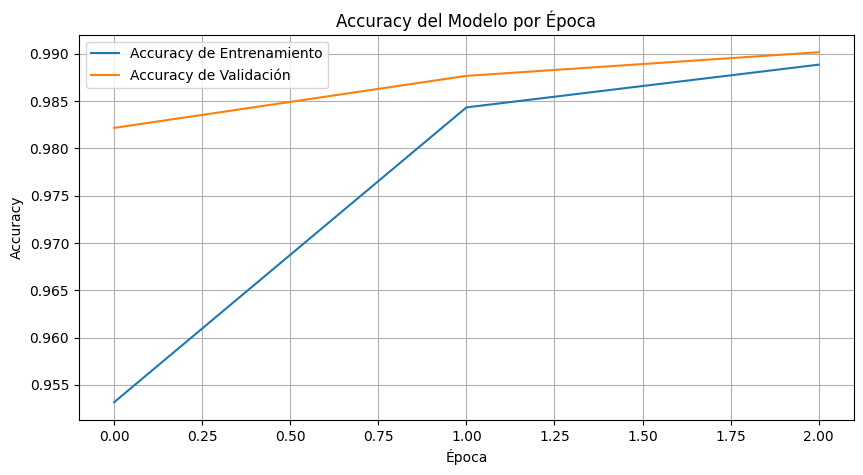

In [5]:
# ==========================================================
# 1️⃣2️⃣ GRAFICAR ACCURACY
# ==========================================================

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Accuracy de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de Validación')
plt.title('Accuracy del Modelo por Época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Esta gráfica muestra la **precisión (accuracy)** del modelo en cada época. Una mejora constante en ambas curvas (entrenamiento y validación) indica que el modelo está aprendiendo bien. Si la curva de entrenamiento sigue subiendo pero la de validación se estanca o baja, podría indicar sobreajuste (overfitting).

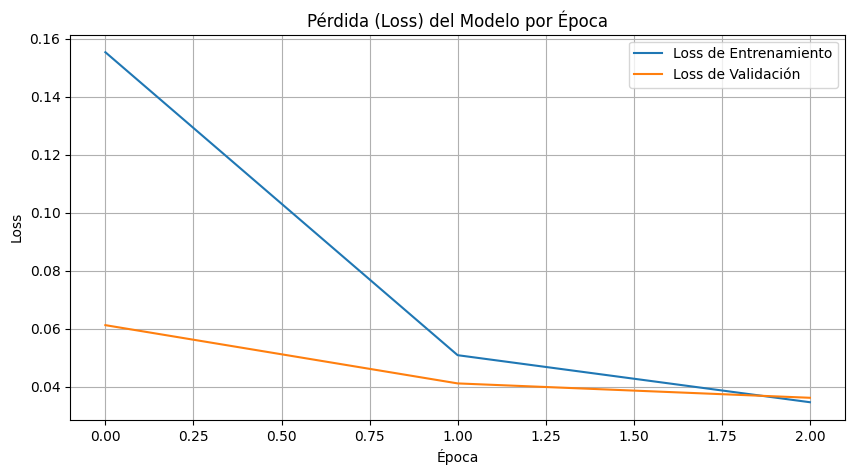

In [6]:
# ==========================================================
# 1️⃣3️⃣ GRAFICAR LOSS
# ==========================================================

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss de Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss de Validación')
plt.title('Pérdida (Loss) del Modelo por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Esta gráfica muestra la **pérdida (loss)** del modelo. Una disminución constante en ambas curvas es deseable, ya que significa que el error del modelo se está reduciendo. Si la pérdida de entrenamiento sigue bajando pero la de validación empieza a subir, es otra señal de sobreajuste. En tu caso, ambas curvas se comportan de forma similar, lo que es una buena señal de que el modelo está aprendiendo correctamente y no está sobreajustando.